In [4]:
import pandas as pd
import numpy.matlib as np
import pathlib 
import matplotlib.pyplot as plt
import seaborn as sns
from process.cp_image_data import cp_image_data, image_stats
drop_columns = pd.read_csv('/fsx/processed-data/220811 96w 9 Gene KO /2022-08-22_soma_objects/2022-08-30_soma_objects_image_column_drop_list.csv', header=None, dtype=str)
exp_path = pathlib.Path('/fsx/processed-data')
sns.set_theme(context='notebook', style='ticks', palette='colorblind')

In [5]:
# Load data
exp_name = '220929 Mattek 20x SD MIP TIFs'
# exp_name = '220929 CellVis Plastic 20x SD MIP TIFs'
# analysis_name = '2022-10-17_soma_objects_CellVis'
analysis_name = '2022-10-11_soma_objects'
pm = pd.read_csv(exp_path / exp_name / 'platemap.csv')
data_path = exp_path / exp_name / analysis_name / (analysis_name + '_Image.csv')
data, pm = cp_image_data(data_path, pm, drop_columns)
data.index = pm['condition']
pm.index = pm['condition']
conditions = pm.index.unique().tolist()
tmp_data = data.loc['nucleofected']

In [26]:
# measurement = 'Median_soma_Intensity_MeanIntensity_CellROX'
measurement = 'Median_soma_Intensity_MeanIntensity_'
# ctrl_cond = ['ctrl']
colorblind=["#0173B2", "#DE8F05", "#029E73", "#D55E00", "#CC78BC",
            "#CA9161", "#FBAFE4", "#949494", "#ECE133", "#56B4E9"],
colorblind_edit = ["#0173B2", "#DE8F05", "#029E73", "#D55E00", "#CC78BC",
             "#949494", "#ECE133", "#56B4E9"]

# Load data
exp_name = '220811 96w 9 Gene KO '
analysis_name = '2022-10-11_soma_objects'
pm = pd.read_csv(exp_path / exp_name / 'platemap.csv')
data_path = exp_path / exp_name / analysis_name / (analysis_name + '_Image.csv')
data, pm = cp_image_data(data_path, pm, drop_columns)
data.index = pm['condition']
pm.index = pm['condition']

# # Merge 09/29/22 ctrls
# # data = pd.concat((data, tmp_data.sample(9, random_state=5)), axis=0)
# data = pd.concat((data, tmp_data), axis=0)
# Subselect conditions
all_data = data
data = data.drop(['SOD1', 'PSAP', 'STAT3', 'MLST8', 'RPTOR', 'FBXL5', 'PLK1'])
conditions = data.index.unique().tolist()

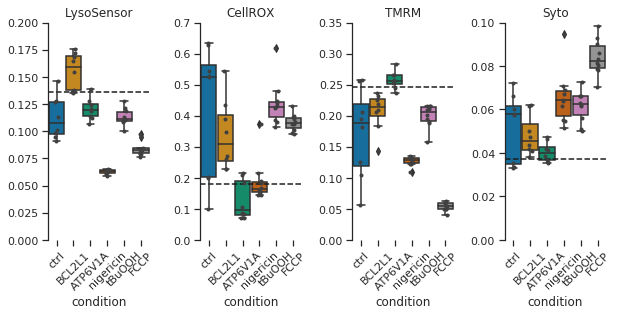

In [27]:

dyes = ['LysoSensor', 'CellROX', 'TMRM', 'Syto']
ylims = [0.2, 0.7, 0.35, 0.1]
fig, ax = plt.subplots(1,4, figsize=(10,4))     
for i, d in enumerate(dyes):
    plt.sca(ax[i])
    proxy_median = all_data[measurement + d].median()
    plt.plot([-0.5, len(conditions)-0.5], [proxy_median, proxy_median], 'k--')
    sns.boxplot(x=data.index, y=data[measurement + d], width=0.9,palette=colorblind_edit)
    sns.stripplot(x=data.index, y=data[measurement + d], color="0.25", s=4)
    plt.xticks(rotation=45)
    plt.title(d)
    ax[i].set_ylabel('')
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    # ax[i].yaxis.grid(True)
    # ax[i].xaxis.grid(True)
    # ctrl_mean = data[measurement + d].loc['nucleofected'].mean()
    # ax[i].get_yaxis().set_visible(False)
    ax[i].set_ylim(0, ylims[i])

ax[0].spines["left"].set_visible(True)
plt.subplots_adjust(wspace=0.5)
plt.savefig('/home/ubuntu/2022-10-19_poster_boxplots.svg')
plt.savefig('/home/ubuntu/2022-10-19_poster_boxplots.png')

In [ ]:
dyes = [['LysoSensor', 'CellROX'],
        ['TMRM', 'Syto']]
measurement = 'Median_soma_Intensity_MeanIntensity_'

fig, ax = plt.subplots(2,2, figsize=(22,15))     
        
for x_plot in range(len(dyes)):
    for y_plot in range(len(dyes[x_plot])):
        plt.sca(ax[x_plot, y_plot])
        d = dyes[x_plot][y_plot]
        sns.boxplot(ax=ax[x_plot,y_plot], x=data.index, y=data[measurement + d ]).set_title(d)
        sns.stripplot(ax=ax[x_plot,y_plot], x=data.index, y=data[measurement + d], color="0.25")
        # plt.xticks(range(14), ['NT ctrl', 'SOD1', 'PSAP', 'STAT3', 'BCL2L1', 'MLST8', 'ATP6V1A', 'RPTOR', 'FBXL5', 'PLK1', 'nigericin', 'tBuOOH', 'FCCP', 'no dye'], rotation=45)
        plt.xlabel('')
        ax[x_plot, y_plot].xaxis.grid(True)
        
fig.suptitle('Median Intensity - soma segment')
